In [23]:
import pandas as pd
from src import data_ops
import math

loss_dir = 'losses'

In [24]:
loss_files = data_ops.gather_files(loss_dir)
loss_files_sort = [f[0].split("\\")[-1][:-4] for f in loss_files]
# sort loss files on loss_files_sort
loss_files = [x for _, x in sorted(zip(loss_files_sort, loss_files))]


<Axes: >

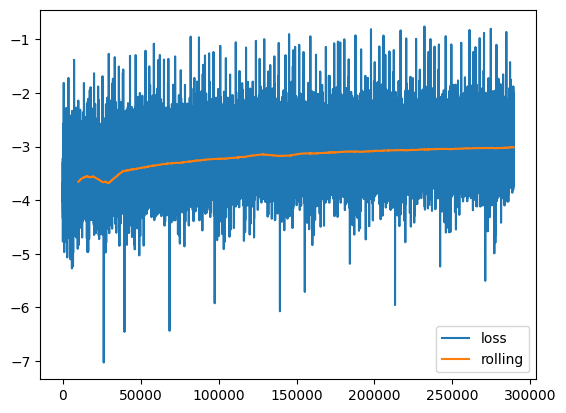

In [25]:
# loss_files = data_ops.gather_files(loss_dir)
# Read in all the loss files
loss_dfs = [pd.read_csv(f, header=None) for f in loss_files]
loss_df = pd.concat(loss_dfs, ignore_index=True)
loss_df.columns = ['batch','loss']
del loss_df['batch']
# loss_df.set_index('batch', inplace=True)
# sort on index
# loss_df.sort_index(inplace=True)
loss_df=loss_df*-1
# Rolling average
loss_df['rolling'] = loss_df['loss'].rolling(window=10000).mean()
loss_df.plot()

In [30]:
print(loss_df['rolling'][10001])
print(loss_df['rolling'][len(loss_df['rolling'])/2])
print(loss_df['rolling'][-1:])

-3.656096691048145
-3.169874543118477
289357   -3.014647
Name: rolling, dtype: float64


0.027123097458295484
0.043549780731592776
289357    0.050771
Name: loss, dtype: float64


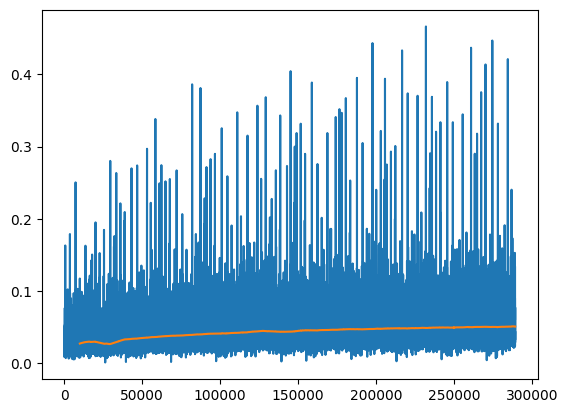

In [33]:
# convert log probs to probs
loss = loss_df['loss'].apply(lambda x: math.exp(x))
rolling = loss.rolling(window=10000).mean()
loss.plot()
rolling.plot()

print(rolling[10001])
print(rolling[len(rolling)/2])
print(rolling[-1:])
